# Kesejahteraan Pekerja di Indonesia

   Kesejahteraan pekerja adalah salah satu indikator kesejahteraan suatu negara dan menjadi fokus perhatian dalam upaya meningkatkan kualitas hidup penduduk. Dalam konteks ini, kita akan menganalisis beberapa aspek kunci kesejahteraan pekerja di Indonesia.

* Garis Kemiskinan:
Pertama-tama, mari kita lihat bagaimana garis kemiskinan di Indonesia telah berubah selama beberapa tahun terakhir. Data ini akan memberi kita gambaran tentang tingkat kemiskinan di negara ini dan dampaknya pada pekerja.

* Pengeluaran:
Pengeluaran rumah tangga juga merupakan indikator penting untuk mengukur kesejahteraan pekerja. Kita akan melihat bagaimana pola pengeluaran berubah seiring waktu, khususnya dalam hal kebutuhan dasar.

* Upah Minimum Provinsi (UMP):
Upah Minimum Provinsi (UMP) adalah standar upah minimum yang harus dibayarkan kepada pekerja di setiap provinsi di Indonesia. Kami akan menggali data UMP untuk berbagai provinsi dan melihat bagaimana perubahan ini mempengaruhi penghasilan pekerja.

* Upah Per Jam:
Upah per jam adalah salah satu cara penting untuk mengukur tingkat kesejahteraan pekerja. Kita akan memeriksa data upah per jam untuk berbagai sektor ekonomi.

Dengan menganalisis data ini, kita akan dapat menggambarkan situasi kesejahteraan pekerja di Indonesia dan mendapatkan pemahaman yang lebih baik tentang masalah-masalah yang perlu diatasi untuk meningkatkan kondisi pekerja di negara ini.

Mari kita mulai dengan mengimpor data dan memulai analisis! 

# Import Data

data di ambil dari kaggle.com:<br>
https://www.kaggle.com/datasets/rezkyyayang/pekerja-sejahtera/download?datasetVersionNumber=1 

In [8]:
import pandas as pd
import numpy as np

In [9]:
g_kemiskinan=pd.read_csv(r'C:\BOOTCAMP\LAIN/gk.df.csv')
keluaran = pd.read_csv(r'C:\BOOTCAMP\LAIN/peng.df.csv')
ump= pd.read_csv(r'C:\BOOTCAMP\LAIN/ump.df.csv')
upah_jam = pd.read_csv(r'C:\BOOTCAMP\LAIN/upah.df.csv')

# Data cleaning

In [10]:
g_kemiskinan.isnull().any()

provinsi    False
jenis       False
daerah      False
tahun       False
periode     False
gk           True
dtype: bool

In [11]:
miss =g_kemiskinan.columns[g_kemiskinan.isnull().any()].tolist()
miss

['gk']

In [12]:
# Calculate the mean for columns with missing values
for column in miss:
    if g_kemiskinan[column].isnull().any():
        mean_value = g_kemiskinan[column].mean()
        g_kemiskinan[column].fillna(mean_value, inplace=True)

In [13]:
g_kemiskinan.isnull().sum()

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

In [14]:
g_kemiskinan.duplicated().sum()

0

In [15]:
keluaran.isna().sum()

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

In [16]:
miss_kel = keluaran.columns[keluaran.isnull().any()].tolist()

In [17]:
# Calculate the mean for columns with missing values
for column in miss_kel:
    if keluaran[column].isnull().any():
        mean_value = keluaran[column].mean()
        keluaran[column].fillna(mean_value, inplace=True)

In [18]:
keluaran.duplicated().sum()

0

In [20]:
miss_ump = ump.columns[ump.isnull().any()].tolist()

In [21]:
for column in miss_ump:
    if ump[column].isnull().any():
        mean_value = ump[column].mean()
        ump[column].fillna(mean_value, inplace=True)

In [22]:
ump.isna().sum()

provinsi    0
tahun       0
ump         0
dtype: int64

In [23]:
keluaran.duplicated().sum()

0

In [24]:
upah_jam.isna().sum()

provinsi    0
tahun       0
upah        0
dtype: int64

In [25]:
upah_jam.duplicated().sum()

0

# EDA(Exploratory Data Analyst)

# Garis Kemiskinan (GK)

In [30]:
g_kemiskinan.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [38]:
print(f'Terdapat banyak data {g_kemiskinan.shape[0]} dengan kolom {g_kemiskinan.shape[1]}')

Terdapat banyak data 5460 dengan kolom 6


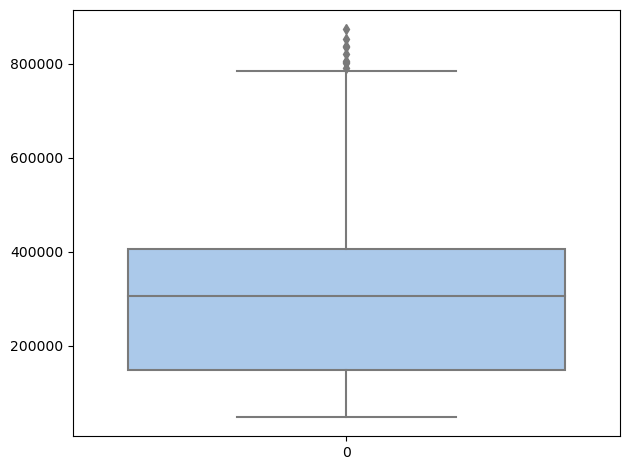

Garis kemiskinan tertinggi 87.28%

Garis kemiskinan terendah 4.86%

Rata-rata 30.39%


In [244]:

sns.boxplot(g_kemiskinan['gk'],palette='pastel')
plt.tight_layout()
plt.show()
maxx = g_kemiskinan['gk'].max()
minn = g_kemiskinan['gk'].min()
mean = g_kemiskinan['gk'].mean()
print(f'Garis kemiskinan tertinggi {maxx/1000000:.2%}\n\nGaris kemiskinan terendah {minn/1000000:.2%}\n\nRata-rata {mean/1000000:.2%}')

**Provinsi vs gk**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

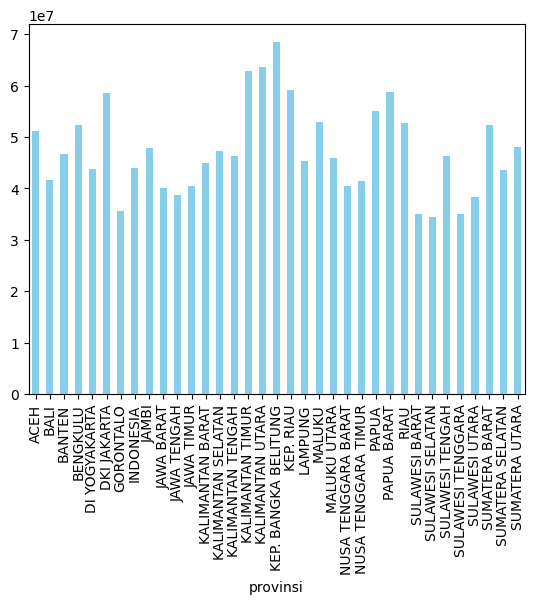

Provinsi dengan jumlah terbanyak KEP. BANGKA BELITUNG dengan jumlah : 68.48%

Provinsi dengan jumlah terendah SULAWESI SELATAN dengan jumlah :34.41%


In [60]:
prov= g_kemiskinan.groupby(['provinsi'])['gk'].sum().T
prov.plot(kind='bar', color='skyblue')
plt.show()
print(f'Provinsi dengan jumlah terbanyak {prov.idxmax()} dengan jumlah : {prov.max()/100000000:.2%}\n\nProvinsi dengan jumlah terendah {prov.idxmin()} dengan jumlah :{prov.min()/100000000:.2%}')

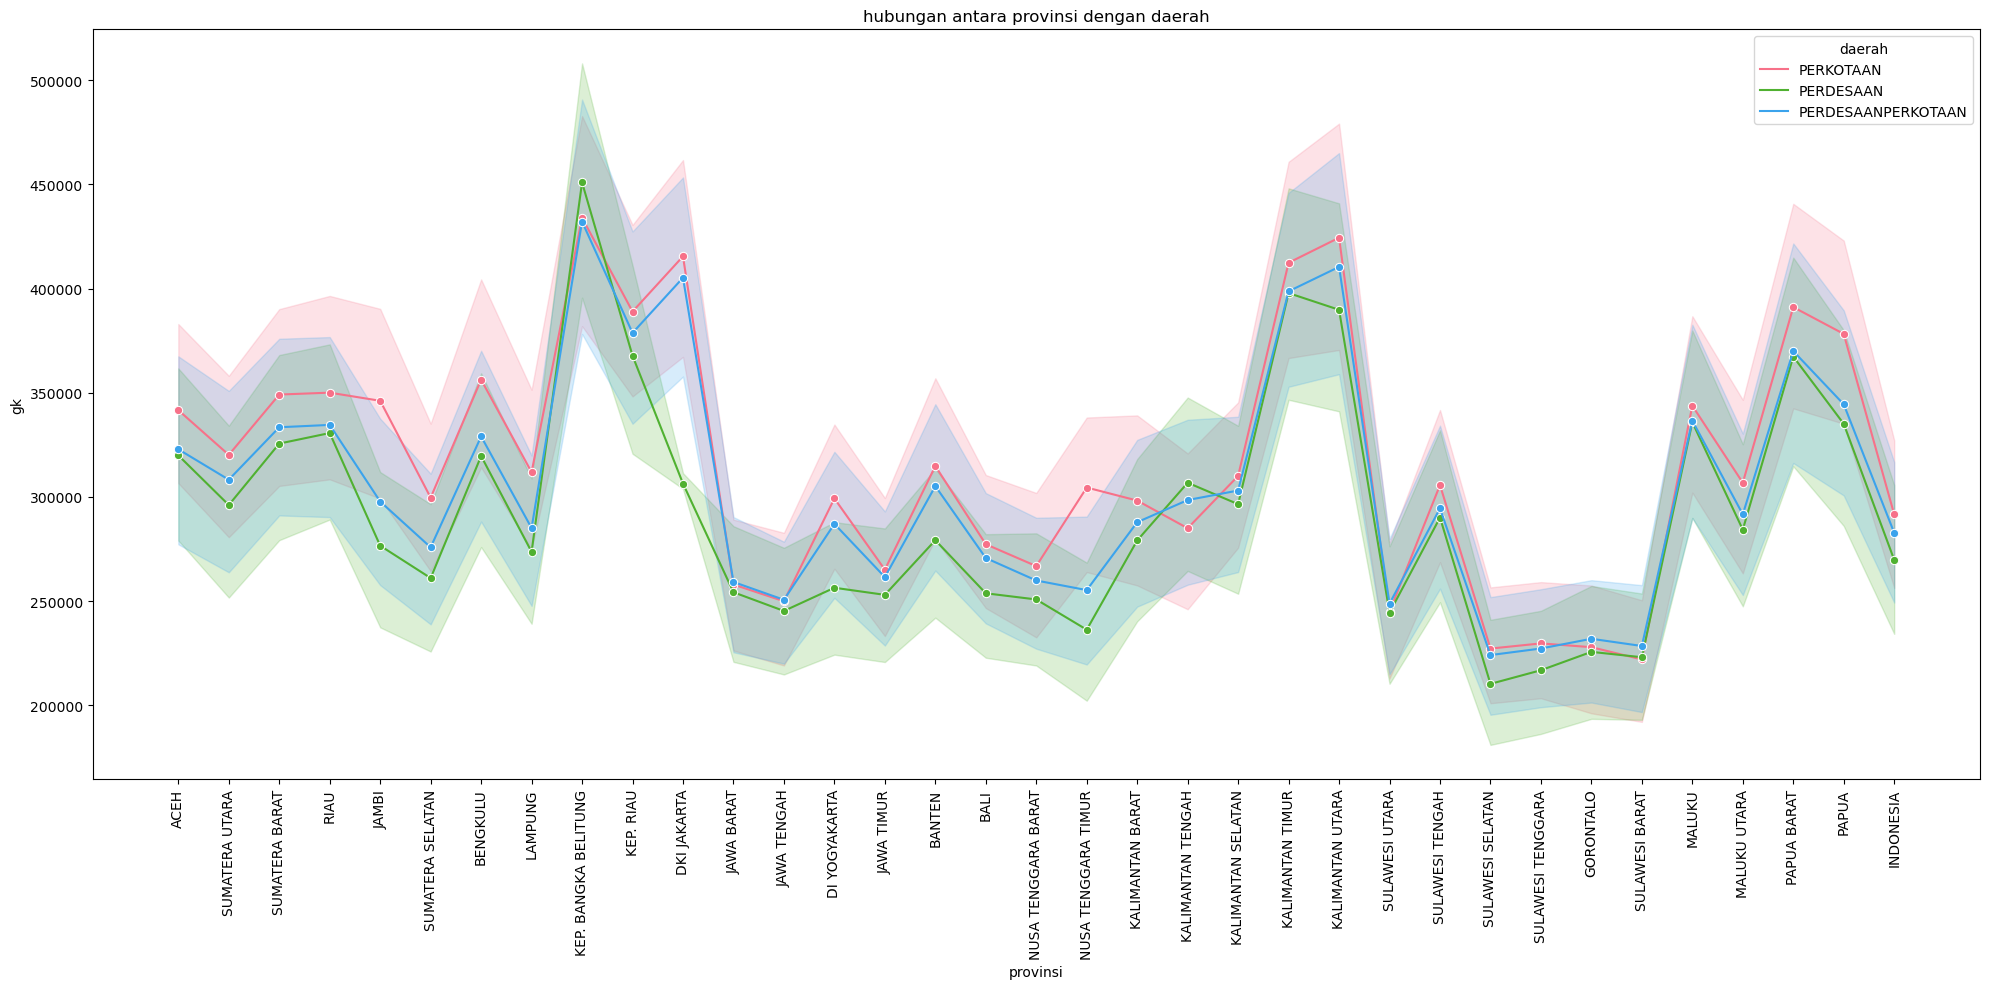

berdasarkan provinsi dengan daerah tertinggi adalah ('KEP. BANGKA BELITUNG', 'PERDESAAN') dengan total 23.45%

berdasarkan provinsi dengan daerah terendah adalah ('SULAWESI SELATAN', 'PERDESAAN') dengan jumlah 10.94%


In [221]:
plt.figure(figsize=(20,10))
sns.lineplot(x='provinsi', y='gk',hue='daerah',data=g_kemiskinan, palette='husl', marker='o' )
plt.title('hubungan antara provinsi dengan daerah')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

pro = g_kemiskinan.groupby(['provinsi','daerah'])['gk'].sum()
print(f'berdasarkan provinsi dengan daerah tertinggi adalah {pro.idxmax()} dengan total {pro.max()/100000000:.2%}\n\nberdasarkan provinsi dengan daerah terendah adalah {pro.idxmin()} dengan jumlah {pro.min()/100000000:.2%}')

**Jenis vs Gk**

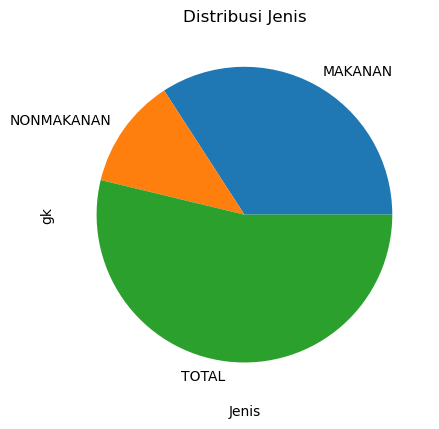

56.64%
20.08%
89.21%
jadi jenis terbanyak adalah TOTAL dengan jumlah: 89.21% dan terendah adalah NONMAKANAN dengan jumlah: 20.08%


In [77]:
jns = g_kemiskinan.groupby(['jenis'])['gk'].sum().astype(int)/1000000000

jns.plot(kind='pie')
plt.title('Distribusi Jenis')
plt.xlabel('Jenis')
plt.show()
for value in jns:
    print(f'{value:.2%}')
print(f'jadi jenis terbanyak adalah {jns.idxmax()} dengan jumlah: {jns.max():.2%} dan terendah adalah {jns.idxmin()} dengan jumlah: {jns.min():.2%}')

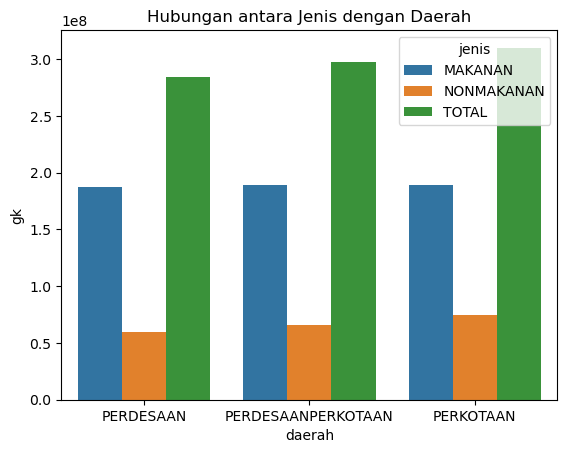

jenis dengan daerah tertinggi adalah ('TOTAL', 'PERKOTAAN') dengan total 31.01%

jenis dengan daerah tertinggi adalah ('NONMAKANAN', 'PERDESAAN') dengan total 6.01%


In [245]:
jns_daerah=g_kemiskinan.groupby(['jenis','daerah'])['gk'].sum().reset_index()
sns.barplot(x='daerah',y='gk', hue='jenis', data=jns_daerah)
plt.title('Hubungan antara Jenis dengan Daerah')
plt.show()
res = g_kemiskinan.groupby(['jenis','daerah'])['gk'].sum()
print(f'jenis dengan daerah tertinggi adalah {res.idxmax()} dengan total {res.max()/1000000000:.2%}\n\njenis dengan daerah tertinggi adalah {res.idxmin()} dengan total {res.min()/1000000000:.2%}')

**Daerah vs Gk**

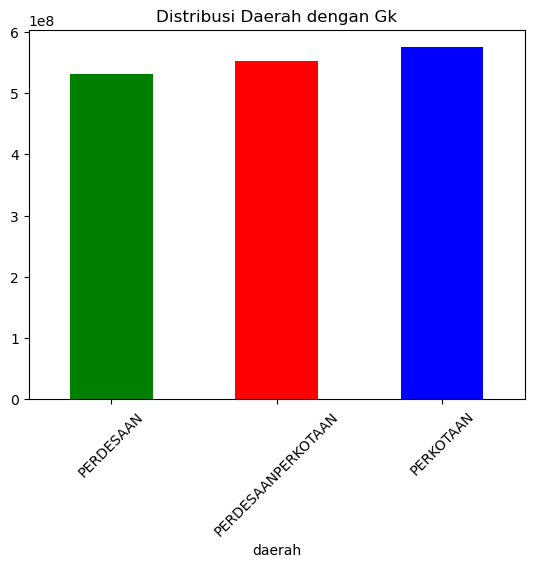

daerah dengan garis kemiskinan terbanyak PERKOTAAN dengan total: 57.45%

daerah dengan garis kemiskinan terendah PERDESAAN dengan total: 53.20%


In [108]:
daerah = g_kemiskinan.groupby(['daerah'])['gk'].sum()
daerah.plot(kind='bar', color = ['g','r','b'])
plt.xticks(rotation =45)
plt.title('Distribusi Daerah dengan Gk')
plt.show()

print(f'daerah dengan garis kemiskinan terbanyak {daerah.idxmax()} dengan total: {daerah.max()/1000000000:.2%}\n\ndaerah dengan garis kemiskinan terendah {daerah.idxmin()} dengan total: {daerah.min()/1000000000:.2%}')

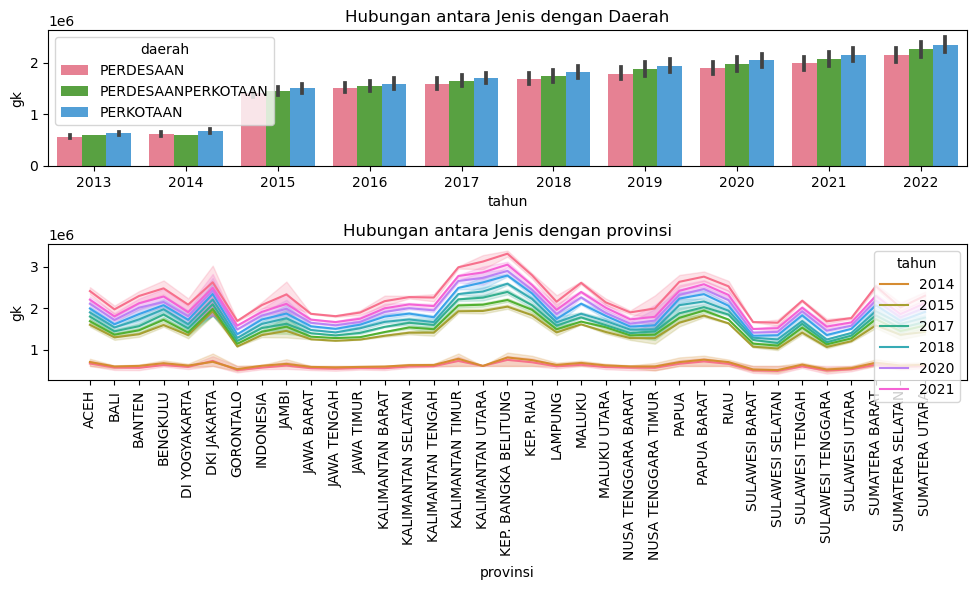

 dari data diatas terdapat hasil tertinggi (2022, 'PERDESAAN', 'KEP. BANGKA BELITUNG') dengan jumlah 33.87%

Serta hasil terendah (2013, 'PERDESAAN', 'SULAWESI SELATAN') dengan jumlah 3.99%


In [268]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,6))
da =g_kemiskinan.groupby(['tahun','daerah','provinsi'])['gk'].sum().reset_index()
sns.barplot(x='tahun',y='gk', hue='daerah', data=da, palette='husl', ax=ax1)
ax1.set_title('Hubungan antara Jenis dengan Daerah')

sns.lineplot(x='provinsi',y='gk', hue='tahun', palette='husl',data=da, ax=ax2)
plt.xticks(rotation=90)
plt.title('Hubungan antara Jenis dengan provinsi')

plt.tight_layout()
plt.show()

d = g_kemiskinan.groupby(['tahun','daerah','provinsi'])['gk'].sum()
print(f' dari data diatas terdapat hasil tertinggi {d.idxmax()} dengan jumlah {d.max()/10000000:.2%}\n\nSerta hasil terendah {d.idxmin()} dengan jumlah {d.min()/10000000:.2%}')

**Tahun vs Gk**

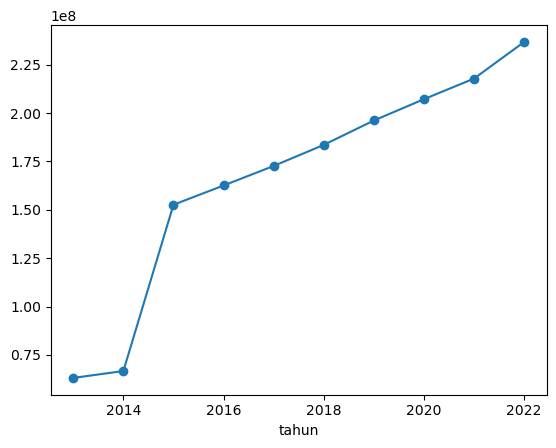

Tahun dengan garis kemiskinan tertinggi 2022 dengan total: 23.68%

Tahun dengan garis kemiskinan terendah 2013 dengan total: 6.31%


In [35]:
tahun = g_kemiskinan.groupby(['tahun'])['gk'].sum()
tahun.plot(kind='line',marker='o' )

plt.show()
print(f'Tahun dengan garis kemiskinan tertinggi {tahun.idxmax()} dengan total: {tahun.max()/1000000000:.2%}\n\nTahun dengan garis kemiskinan terendah {tahun.idxmin()} dengan total: {tahun.min()/1000000000:.2%}')

**Periode vs Gk**

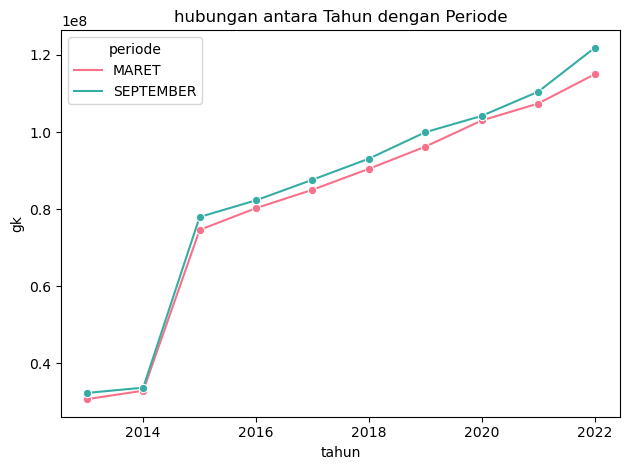

berdasarkan tahun dengan periode tertinggi adalah (2022, 'SEPTEMBER') dengan total 12.18%

berdasarkan tahun dengan periode terendah adalah (2013, 'MARET') dengan jumlah 3.07%


In [226]:
thn_periode =g_kemiskinan.groupby(['tahun', 'periode'])['gk'].sum().reset_index()
sns.lineplot(x='tahun', y='gk', hue='periode', data=thn_periode, marker='o',palette='husl')
plt.title('hubungan antara Tahun dengan Periode')
plt.tight_layout()
plt.show()

th = g_kemiskinan.groupby(['tahun', 'periode'])['gk'].sum()
print(f'berdasarkan tahun dengan periode tertinggi adalah {th.idxmax()} dengan total {th.max()/1000000000:.2%}\n\nberdasarkan tahun dengan periode terendah adalah {th.idxmin()} dengan jumlah {th.min()/1000000000:.2%}')


# Pengeluaran

In [269]:
keluaran.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


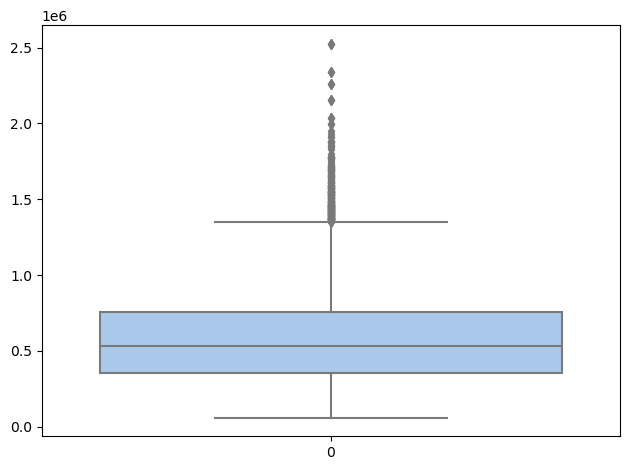

Pengeluaran tertinggi 25.25%

Pengeluaran terendah 5.92%

Rata-rata 60.12%


In [357]:

sns.boxplot(keluaran['peng'],palette='pastel')
plt.tight_layout()
plt.show()
maxx = keluaran['peng'].max()
minn = keluaran['peng'].min()
mean = keluaran['peng'].mean()
print(f'Pengeluaran tertinggi {maxx/10000000:.2%}\n\nPengeluaran terendah {minn/1000000:.2%}\n\nRata-rata {mean/1000000:.2%}')

In [270]:
pengeluaran_per_provinsi = keluaran.groupby(['provinsi','daerah','jenis'])['peng'].sum()
tahun_bulan = keluaran.groupby(['tahun'])['peng'].sum()

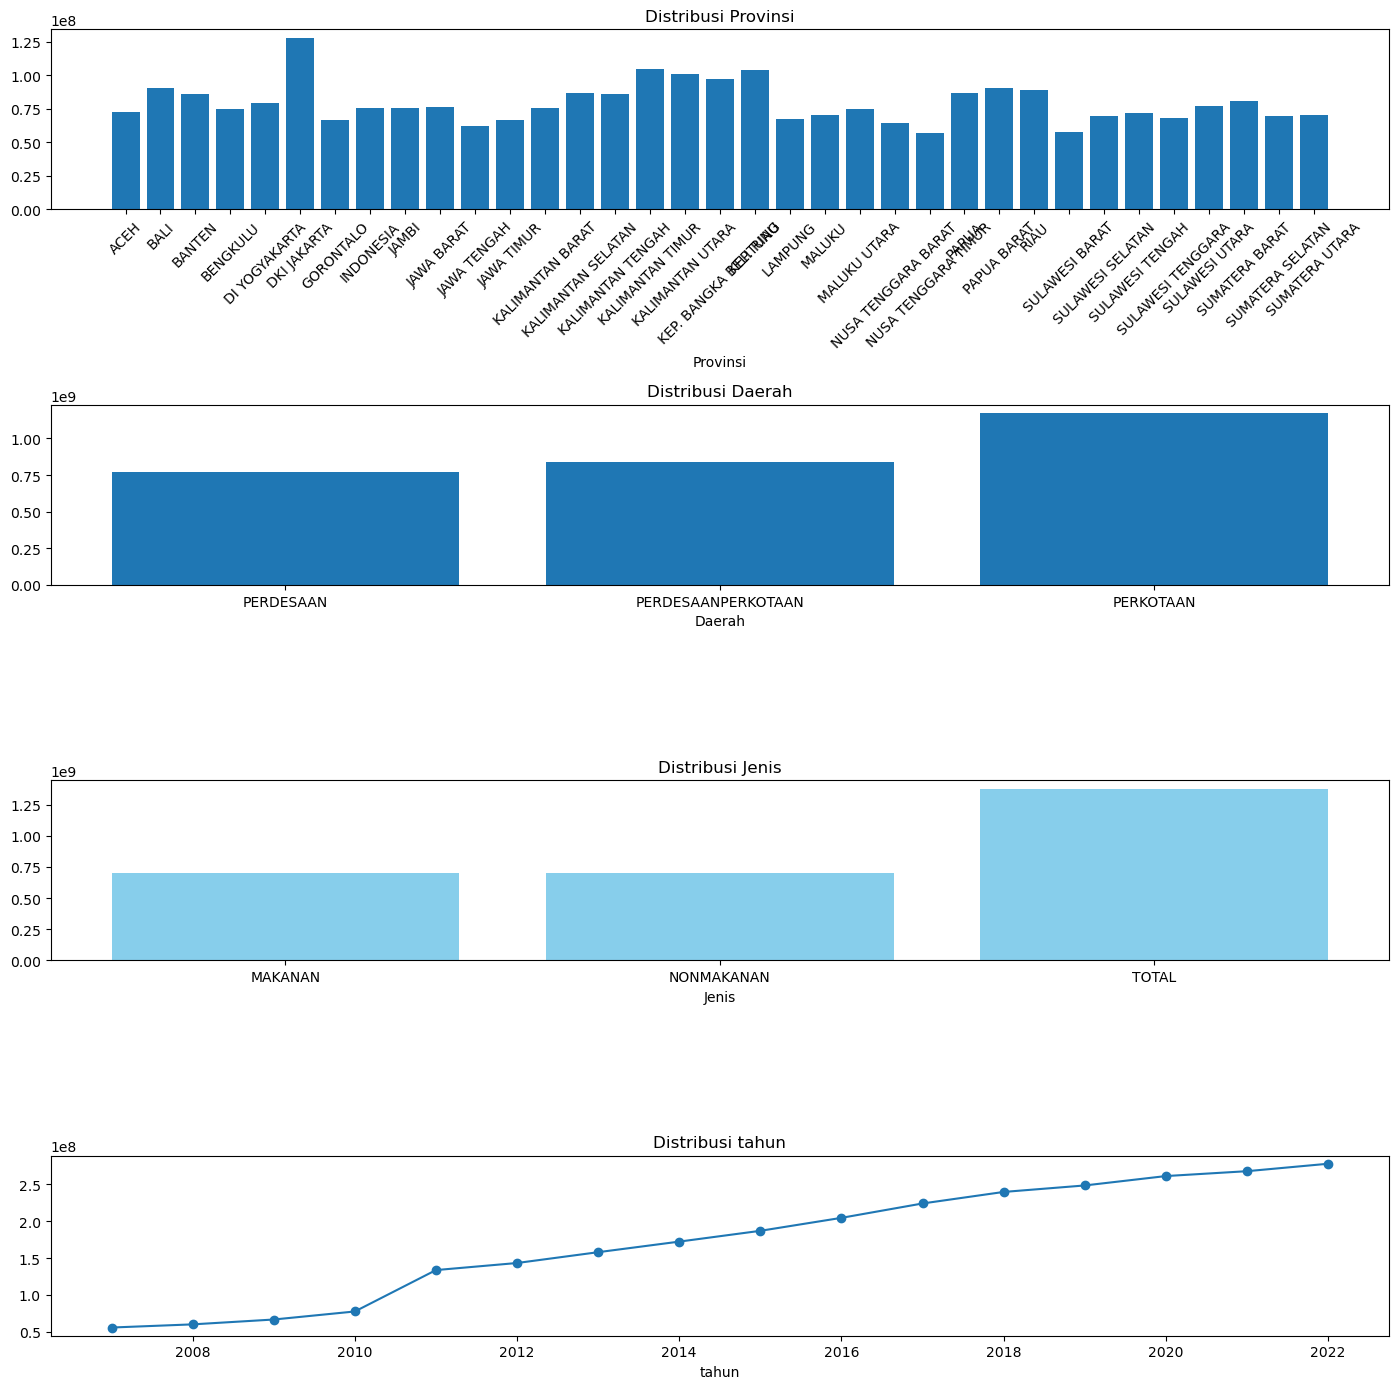

Berdasarkan pengeluaran tertinggi : ('DKI JAKARTA', 'PERKOTAAN', 'TOTAL') dengan jumlah 26.56%

Berdasarkan pengeluaran terendah : ('NUSA TENGGARA TIMUR', 'PERDESAAN', 'NONMAKANAN') dengan jumlah 2.71%

Berdasarkan tahun pengeluaran terbanyak adalah di tahun 2022 dengan jumlah 27.79%

Berdasarkan tahun dengan pengeluaran terendah adalah di tahun 2007 dengan jumlah 5.57%


In [41]:
import matplotlib.pyplot as plt

# Membuat tiga subplot dalam satu gambar (figure)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(14, 14))

# Menggambar plot batang (bar plot) pada ax1
ax1.bar(pengeluaran_per_provinsi.groupby('provinsi').sum().index, pengeluaran_per_provinsi.groupby('provinsi').sum().values)
ax1.set_title('Distribusi Provinsi')
ax1.set_xlabel('Provinsi')
ax1.tick_params(axis='x', rotation=45)  # Mengatur rotasi label sumbu X

# Menggambar plot batang (bar plot) pada ax2
ax2.bar(pengeluaran_per_provinsi.groupby('daerah').sum().index, pengeluaran_per_provinsi.groupby('daerah').sum().values)
ax2.set_title('Distribusi Daerah')
ax2.set_xlabel('Daerah')


# Menggambar plot batang (bar plot) pada ax3
ax3.bar(pengeluaran_per_provinsi.groupby('jenis').sum().index, pengeluaran_per_provinsi.groupby('jenis').sum().values, color='skyblue')
ax3.set_title('Distribusi Jenis')
ax3.set_xlabel('Jenis')

ax4.plot(tahun_bulan.groupby('tahun').sum().index, tahun_bulan.groupby('tahun').sum().values, marker='o')
ax4.set_title('Distribusi tahun')
ax4.set_xlabel('tahun')



# Mengatur layout subplot agar rapi
plt.tight_layout()

# Menampilkan gambar (figure) dengan ketiga subplot
plt.show()

minnn=pengeluaran_per_provinsi.idxmax()
maxxx= pengeluaran_per_provinsi.idxmin()
m= pengeluaran_per_provinsi.max()
mi= pengeluaran_per_provinsi.min()
thn=tahun_bulan.idxmax()
thn_count =tahun_bulan.max()
thn_min=tahun_bulan.idxmin()
thn_min_count = tahun_bulan.min()
print(f'Berdasarkan pengeluaran tertinggi : {minnn} dengan jumlah {m/100000000:.2%}\n\nBerdasarkan pengeluaran terendah : {maxxx} dengan jumlah {mi/100000000:.2%}\n\nBerdasarkan tahun pengeluaran terbanyak adalah di tahun {thn} dengan jumlah {thn_count/1000000000:.2%}\n\nBerdasarkan tahun dengan pengeluaran terendah adalah di tahun {thn_min} dengan jumlah {thn_min_count/1000000000:.2%}')

In [274]:
pe = keluaran.groupby(['provinsi','daerah','tahun'])['peng'].sum()
dae =  keluaran.groupby(['jenis','daerah','tahun'])['peng'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_3196\500173284.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


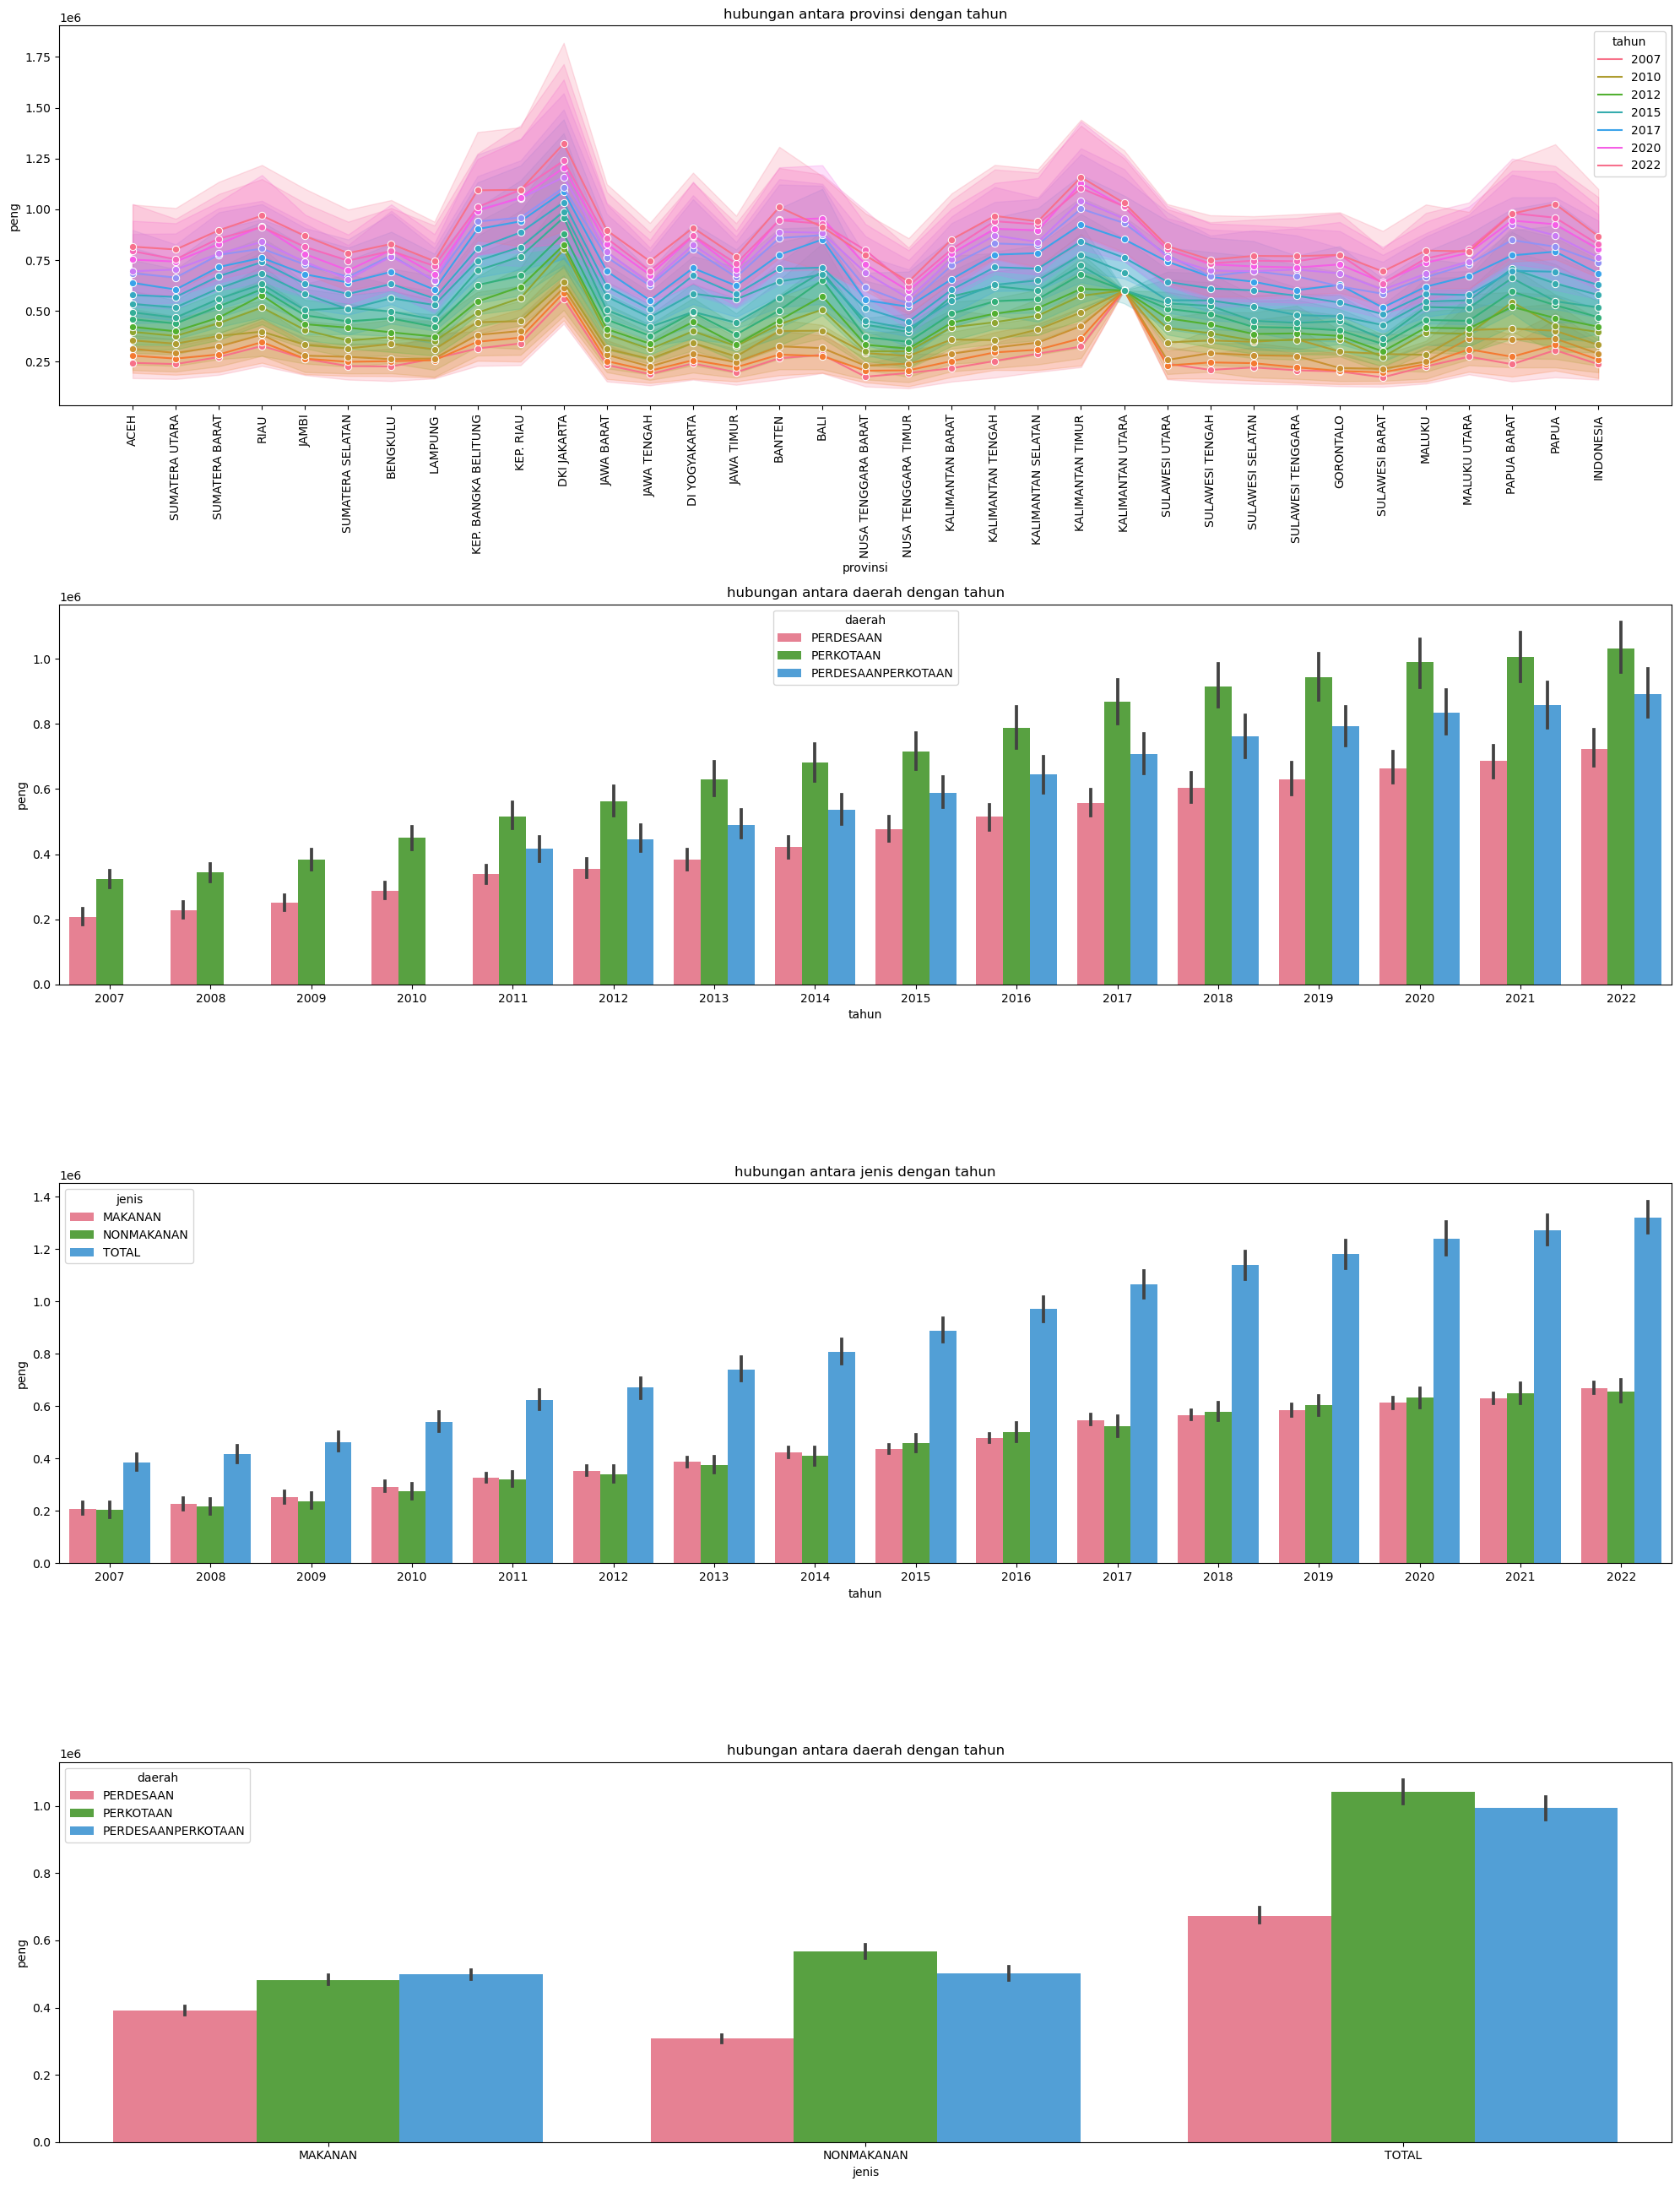

berdasarkan insight tertinggi ('DKI JAKARTA', 'PERDESAANPERKOTAAN', 2022) dengan jumlah 50.51%
Dengan terendah ('NUSA TENGGARA TIMUR', 'PERDESAAN', 2007) dengan jumlah 3.43%
Insight selanjutnya tertinggi ('TOTAL', 'PERKOTAAN', 2022) dengan jumlah 54.21%
serta terendah ('NONMAKANAN', 'PERDESAAN', 2007) dengan jumlah 5.00%


In [294]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,26))
sns.lineplot(x='provinsi',y='peng', hue='tahun', data=keluaran, ax=ax1, palette='husl', marker='o')
ax1.set_title('hubungan antara provinsi dengan tahun')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(x='tahun',y='peng', hue='daerah', data=keluaran, ax=ax2, palette='husl')
ax2.set_title('hubungan antara daerah dengan tahun')

sns.barplot(x='tahun',y='peng', hue='jenis', data=keluaran, ax=ax3, palette='husl')
ax3.set_title('hubungan antara jenis dengan tahun')

sns.barplot(x='jenis',y='peng', hue='daerah', data=keluaran, ax=ax4, palette='husl')
ax4.set_title('hubungan antara daerah dengan tahun')



plt.tight_layout()
plt.show()

print(f'berdasarkan insight tertinggi {pe.idxmax()} dengan jumlah {pe.max()/10000000:.2%}')
print(f'Dengan terendah {pe.idxmin()} dengan jumlah {pe.min()/10000000:.2%}')

print(f'Insight selanjutnya tertinggi {dae.idxmax()} dengan jumlah {dae.max()/100000000:.2%}')
print(f'serta terendah {dae.idxmin()} dengan jumlah {dae.min()/100000000:.2%}')


# Upah Minimum Provinsi

In [295]:
ump.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


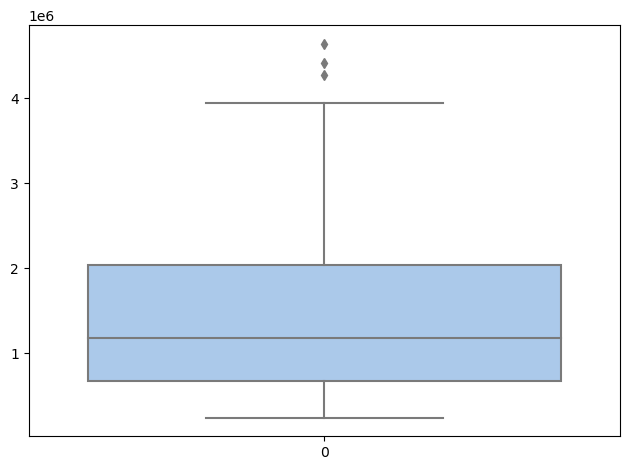

UMP tertinggi 46.42%

UMP terendah 24.50%

Rata-rata 14.02%


In [361]:

sns.boxplot(ump['ump'],palette='pastel')
plt.tight_layout()
plt.show()
maxx = ump['ump'].max()
minn = ump['ump'].min()
mean = ump['ump'].mean()
print(f'UMP tertinggi {maxx/10000000:.2%}\n\nUMP terendah {minn/1000000:.2%}\n\nRata-rata {mean/10000000:.2%}')

C:\Users\HP\AppData\Local\Temp\ipykernel_3196\114973961.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x ='tahun',y='ump',data=ump,ax= ax2, marker='o',palette='husl')


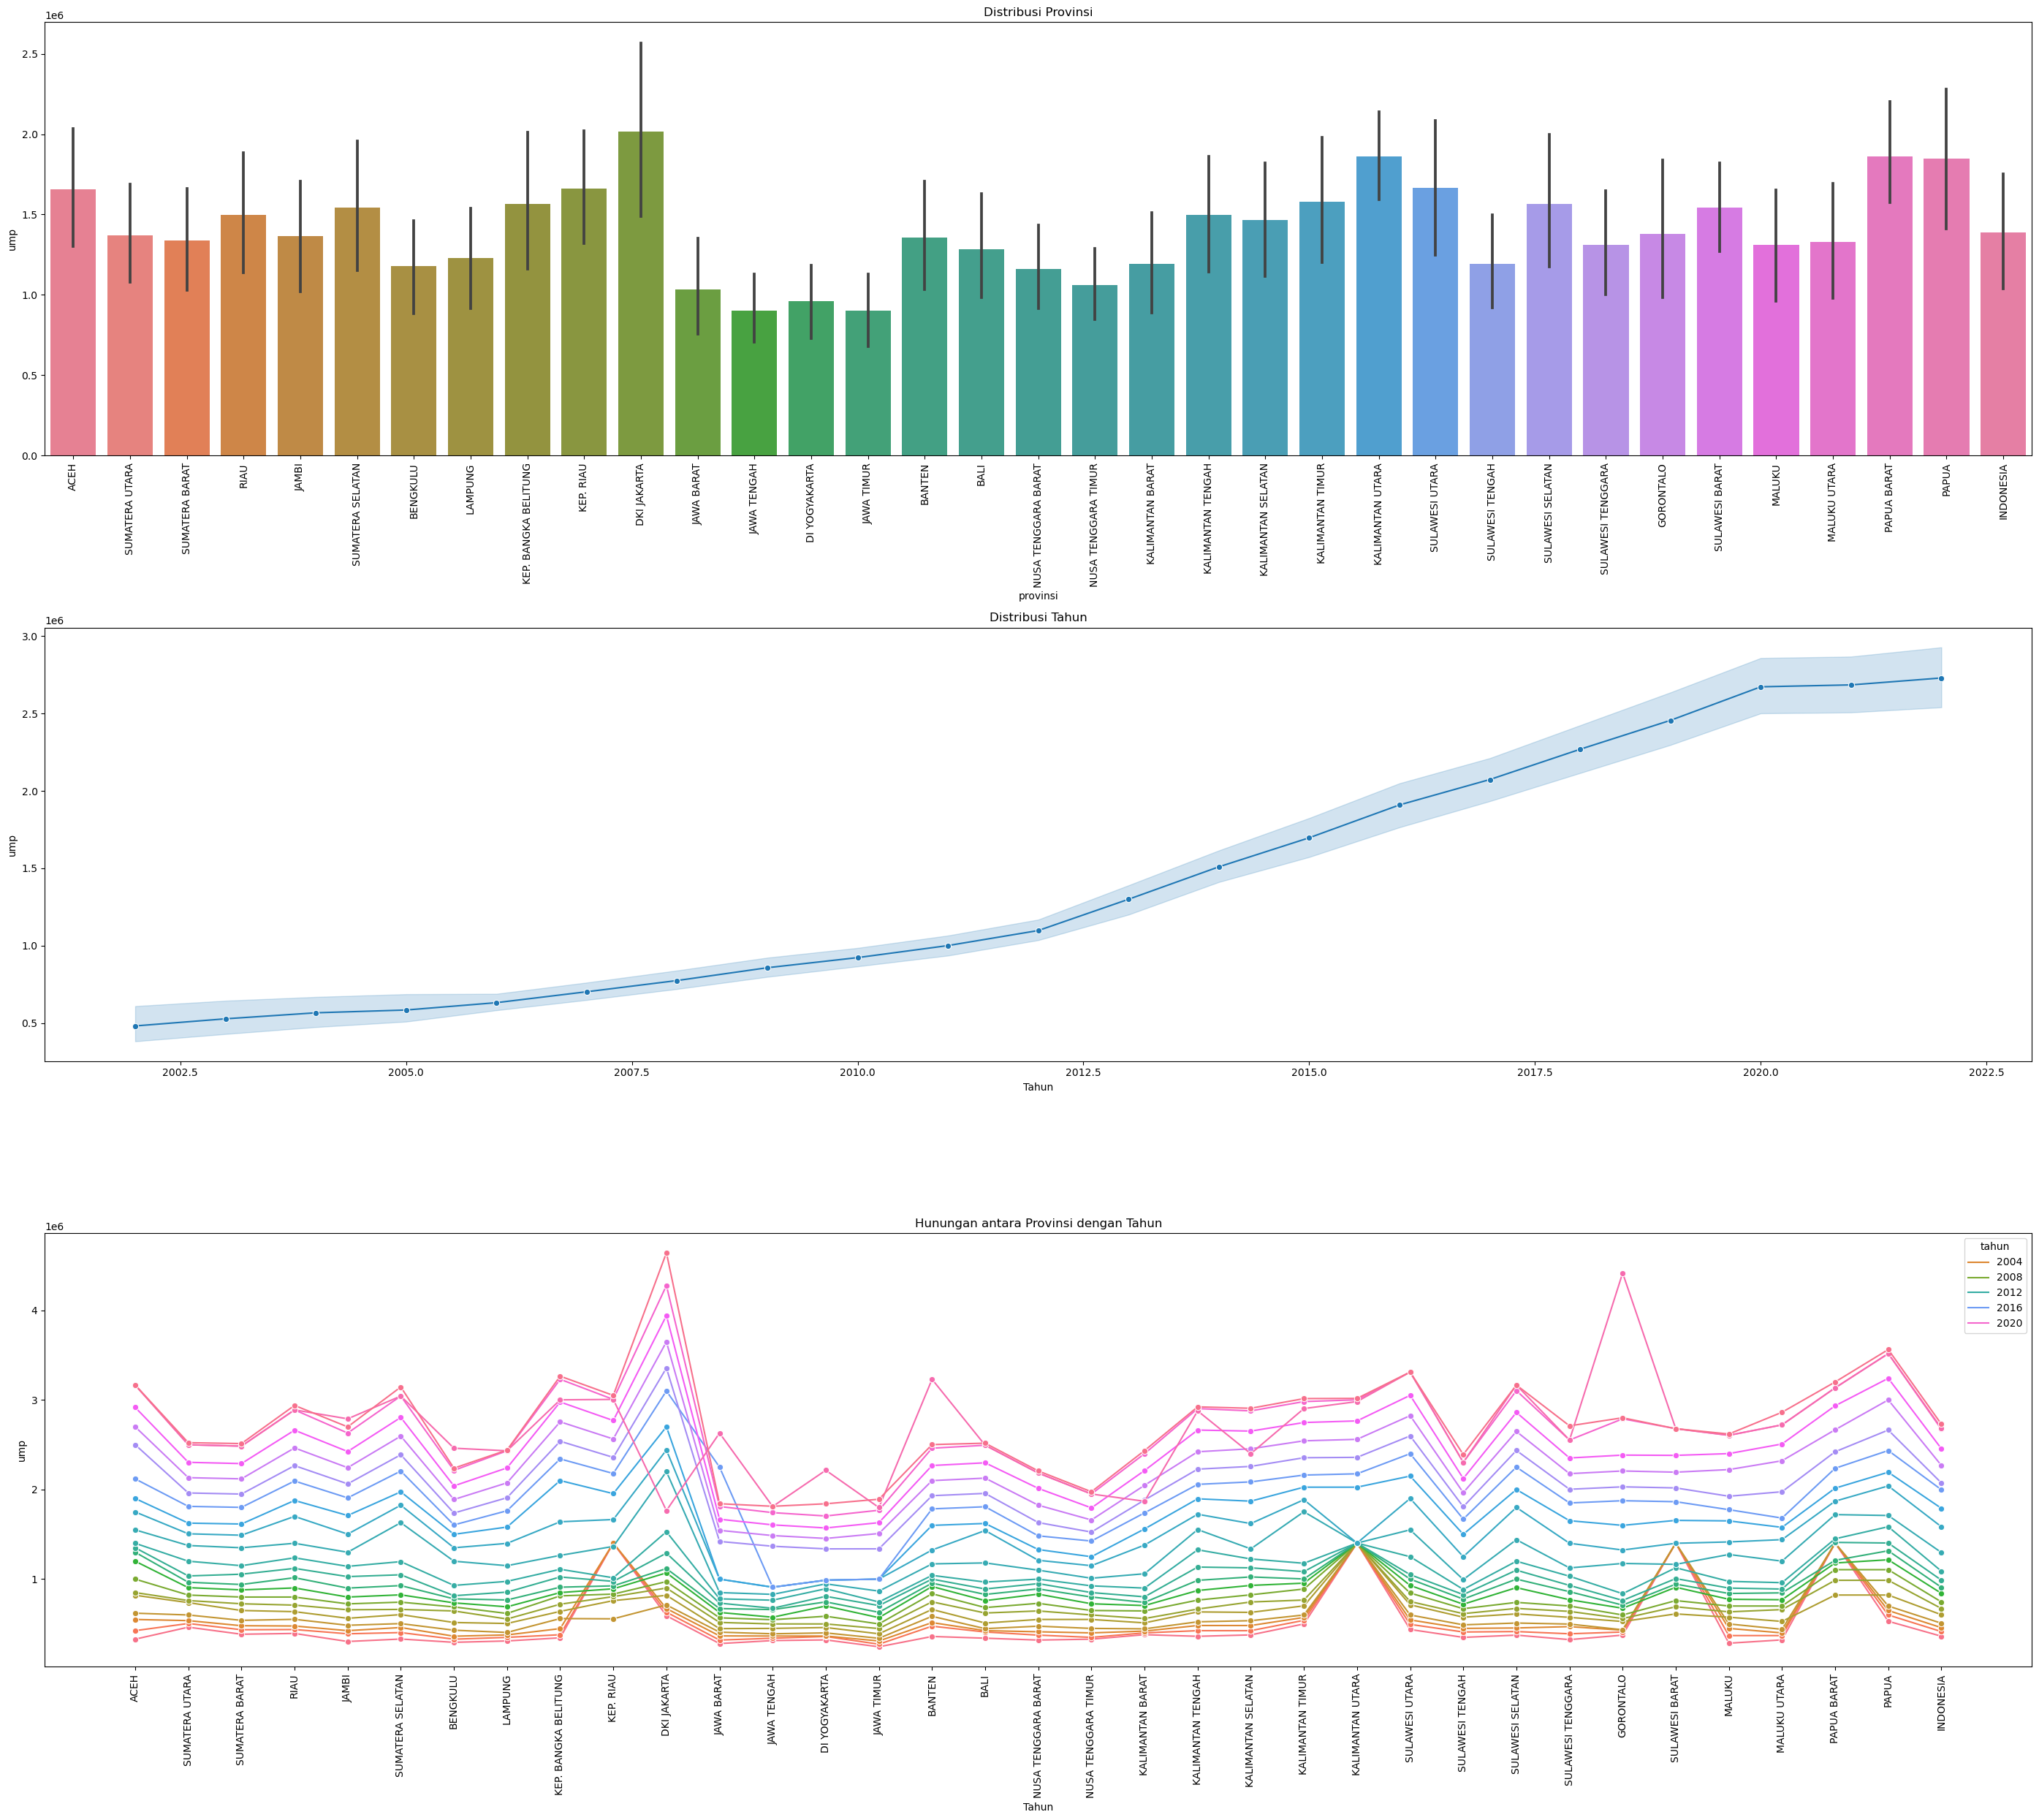

Provinsi dengan UMP tertinggi adalah ('DKI JAKARTA', 2022) dengan jumlah 46.42%

Provinsi dengan UMP terendah adalah ('JAWA TIMUR', 2002) dengan jumlah : 2.450000%


In [322]:
provinsi_ump = ump.groupby(['provinsi','tahun'])['ump'].sum()


fig, (ax1, ax2,ax3)=plt.subplots(3,1,figsize=(28,25))
sns.barplot(x ='provinsi',y='ump',data=ump,ax= ax1, palette='husl' )
ax1.set_xlabel('provinsi')
ax1.set_title('Distribusi Provinsi')
ax1.tick_params(axis='x', rotation=90)


sns.lineplot(x ='tahun',y='ump',data=ump,ax= ax2, marker='o',palette='husl')
ax2.set_xlabel('Tahun')
ax2.set_title('Distribusi Tahun')


sns.lineplot(x ='provinsi',y='ump',hue='tahun',data=ump,marker='o',ax= ax3,palette='husl')
ax3.set_xlabel('Tahun')
ax3.set_title('Hunungan antara Provinsi dengan Tahun')
ax3.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


print(f'Provinsi dengan UMP tertinggi adalah {provinsi_ump.idxmax()} dengan jumlah {provinsi_ump.max()/10000000:.2%}\n\nProvinsi dengan UMP terendah adalah {provinsi_ump.idxmin()} dengan jumlah : {provinsi_ump.min()/10000000:2%}')

# Upah perJam

In [323]:
upah_jam.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


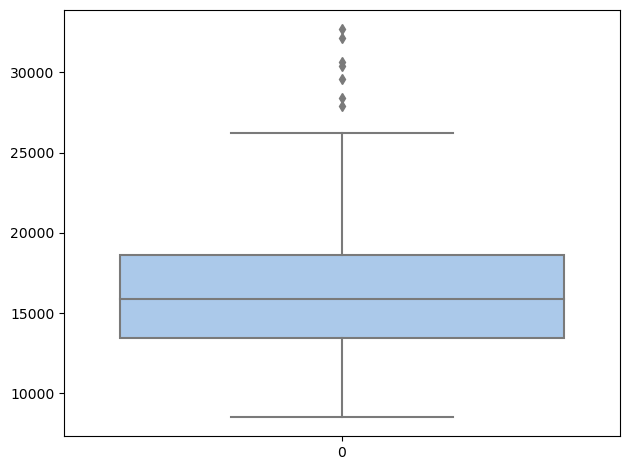

Upah perJam tertinggi 32.68%

Upah perJam terendah 8.53%

Rata-rata 16.62%


In [370]:

sns.boxplot(upah_jam['upah'],palette='pastel')
plt.tight_layout()
plt.show()
maxx = upah_jam['upah'].max()
minn = upah_jam['upah'].min()
mean = upah_jam['upah'].mean()
print(f'Upah perJam tertinggi {maxx/100000:.2%}\n\nUpah perJam terendah {minn/100000:.2%}\n\nRata-rata {mean/100000:.2%}')

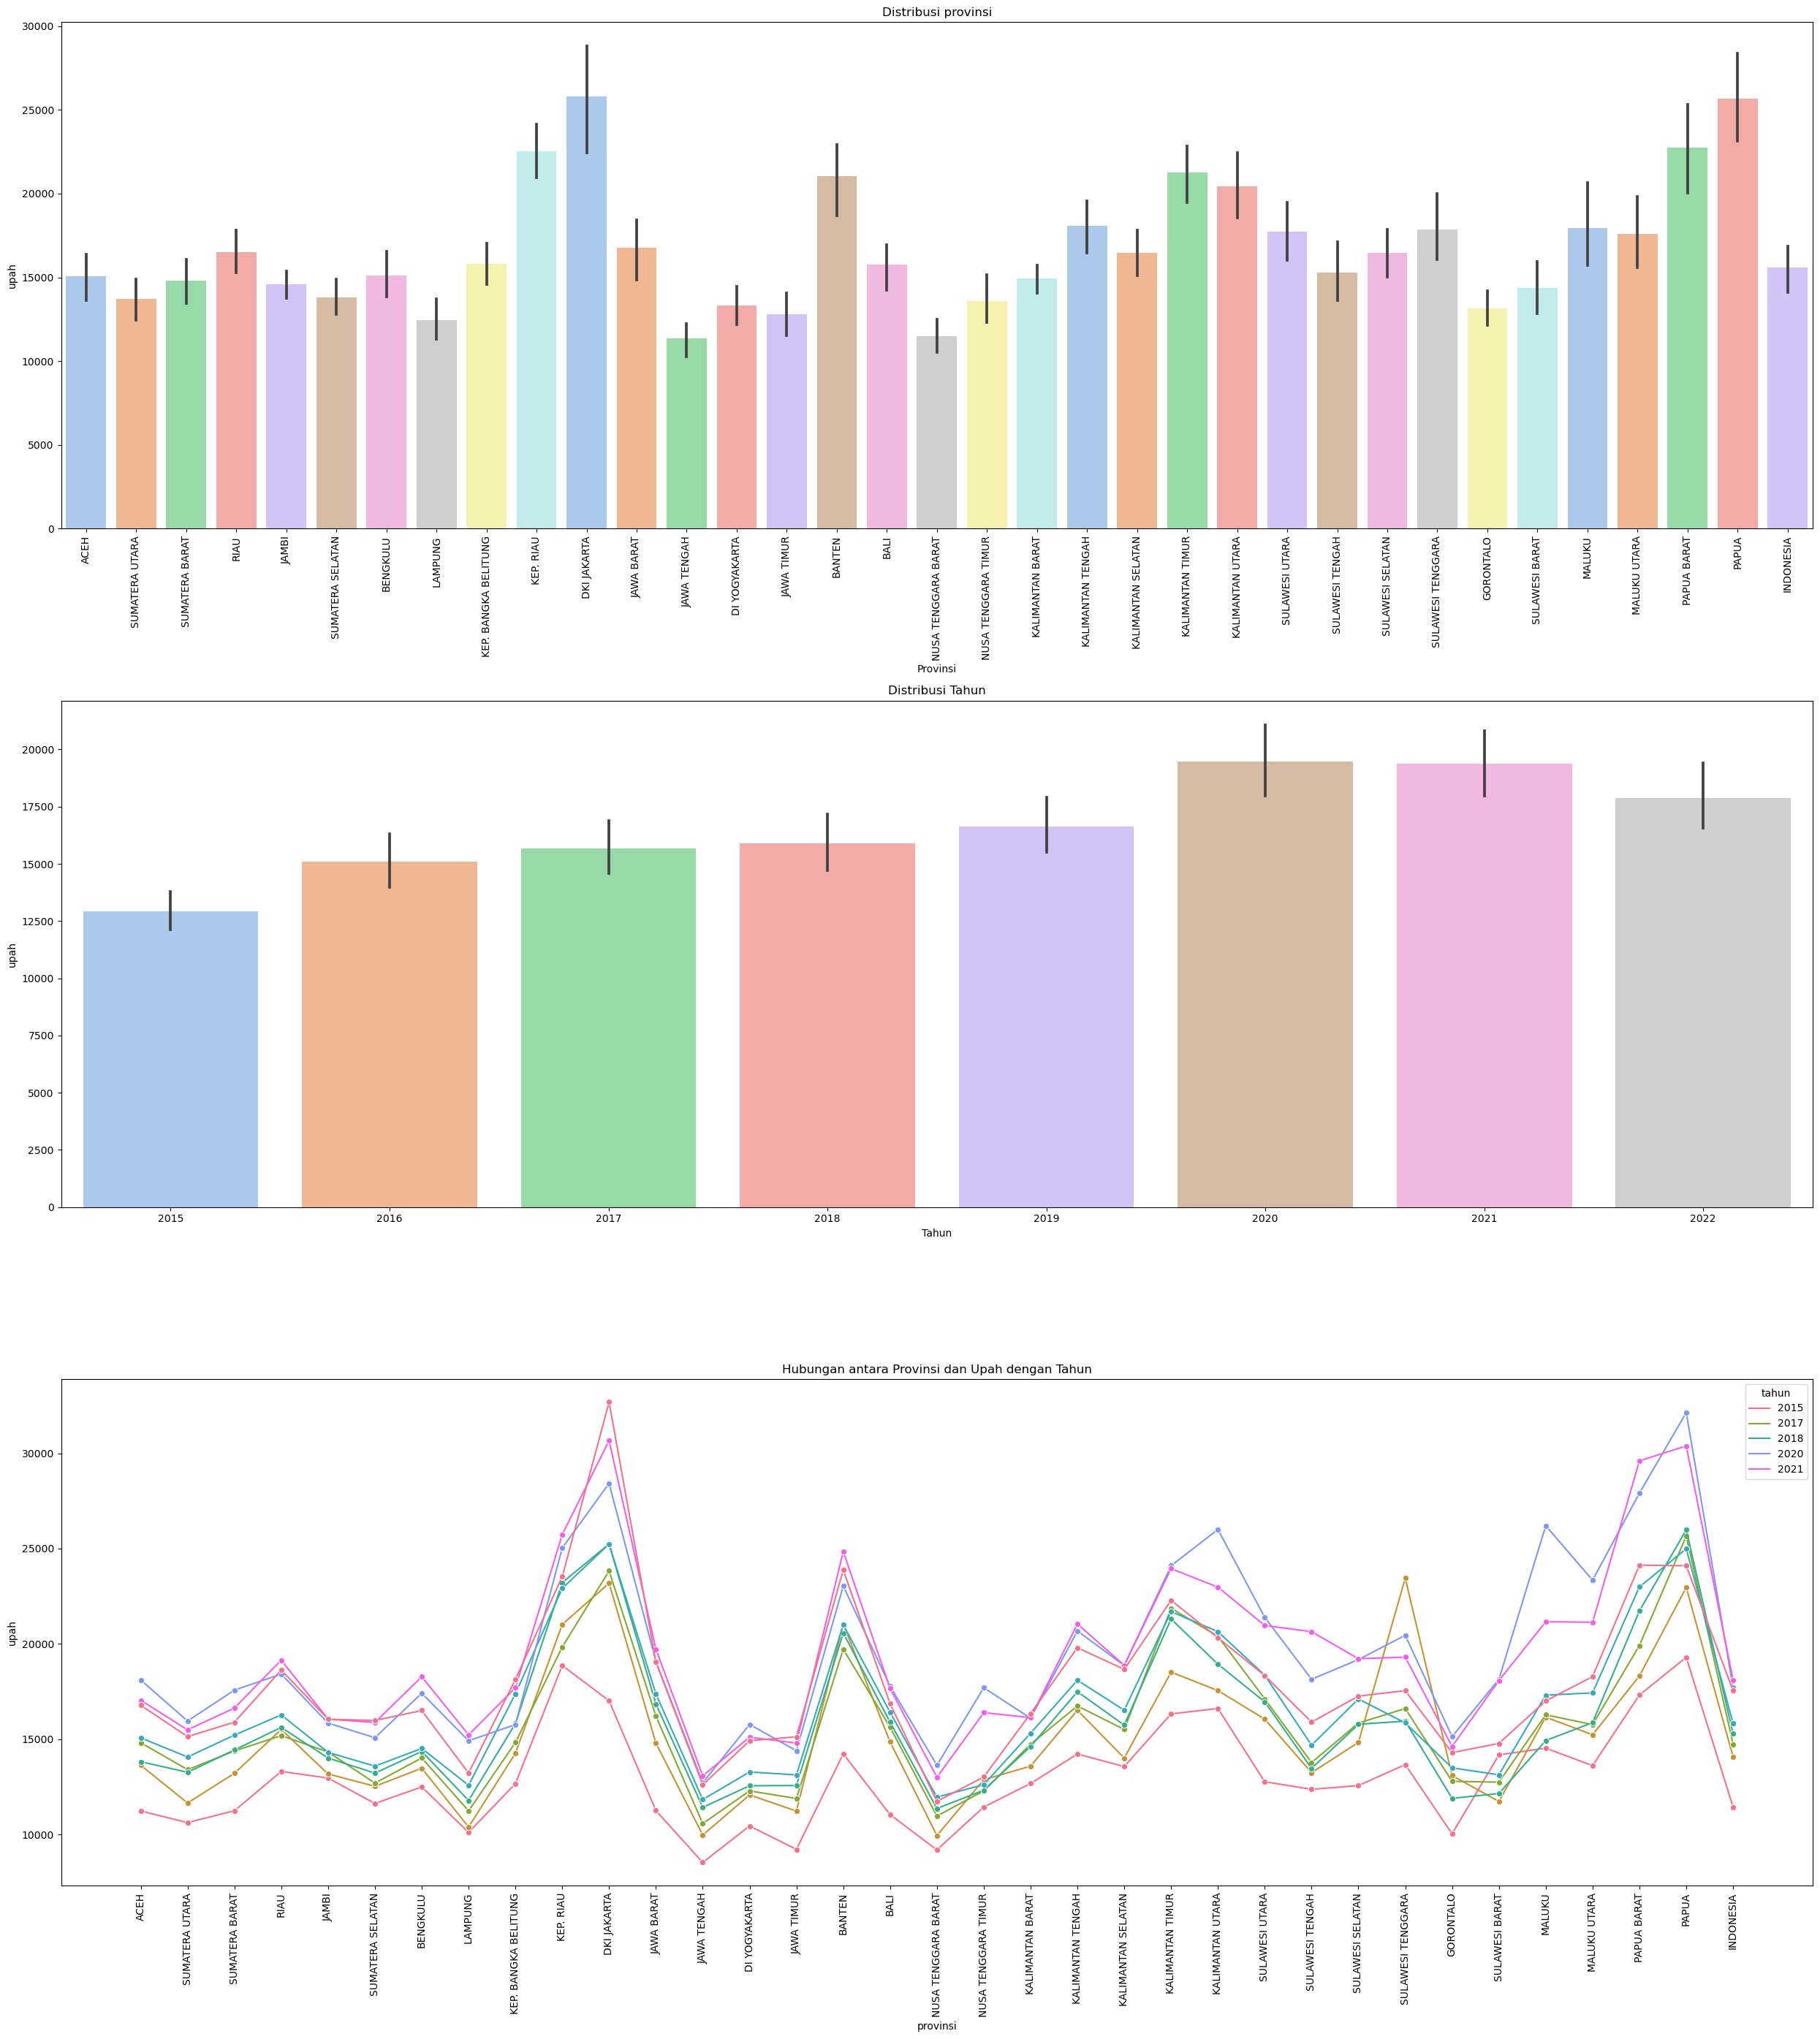

Upah perJam tertinggi adalah provinsi ('DKI JAKARTA', 2022) dengan jumlah : 32.68%

Upah perJam terendah provinsi ('JAWA TENGAH', 2015) dengan jumlah : 8.53%

Namun pada tahun terdapat yang paling banyak di tahun 2020 dengan jumlah 68.20%


In [383]:
upah = upah_jam.groupby(['provinsi','tahun'])['upah'].sum()
thnn = upah_jam.groupby(['tahun'])['upah'].sum()

fig,(ax1,ax2, ax3)=plt.subplots(3,1,figsize=(25,28))
sns.barplot(x='provinsi', y='upah', data=upah_jam, ax=ax1, palette='pastel')
ax1.set_xlabel('Provinsi')
ax1.set_title('Distribusi provinsi')
ax1.tick_params(axis='x',rotation=90)

sns.barplot(x='tahun', y='upah', data=upah_jam, ax=ax2, palette='pastel')
ax2.set_xlabel('Tahun')
ax2.set_title('Distribusi Tahun')

sns.lineplot(x='provinsi', y='upah', hue='tahun',data=upah_jam,ax =ax3, palette='husl', marker='o')
ax3.tick_params(axis='x',rotation=90)
ax3.set_title('Hubungan antara Provinsi dan Upah dengan Tahun')
plt.tight_layout()
plt.show()
print(f'Upah perJam tertinggi adalah provinsi {upah.idxmax()} dengan jumlah : {upah.max()/100000:.2%}\n\nUpah perJam terendah provinsi {upah.idxmin()} dengan jumlah : {upah.min()/100000:.2%}\n\nNamun pada tahun terdapat yang paling banyak di tahun {thnn.idxmax()} dengan jumlah {thnn.max()/1000000:.2%}')

# Conclusion

In [377]:
from IPython.display import HTML
HTML('<img src="result2.jpg" width="1000">')

**Insight:**

* Variabilitas tingkat kemiskinan menunjukkan perbedaan signifikan antara provinsi, jenis, daerah, dan tahun. Ini mengindikasikan perlunya kebijakan yang lebih tepat sasaran.
* Pengeluaran masyarakat juga bervariasi, dengan beberapa provinsi memiliki pengeluaran lebih tinggi. Hal ini dapat memengaruhi tingkat kemiskinan.
* Upah Minimum Provinsi (UMP) dan upah per jam berdampak signifikan pada kondisi ekonomi dan tingkat kemiskinan di suatu daerah.
* Tahun 2022 menunjukkan tren peningkatan signifikan dalam beberapa aspek, seperti tingkat kemiskinan, pengeluaran, dan upah per jam.<br>

**Kesimpulan :**

Data ini memberikan pemahaman yang dalam tentang kondisi ekonomi, kemiskinan, dan pengeluaran di berbagai provinsi dan tahun. Keberagaman ini harus dipertimbangkan dalam perencanaan kebijakan ekonomi dan sosial guna meningkatkan kesejahteraan masyarakat. Peningkatan upah minimum dan pengeluaran dapat menjadi faktor penting dalam mengurangi kemiskinan